In [2]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import torch
import json
from torchvision import models, datasets
import random

from data_utils.data_setup import get_imagenet_test, get_top_prediction, get_imagenet_classes
from techniques.gen_patch import gen_adversarial_patch
from metrics.utils import *
from techniques.utils import get_displ_img
from techniques.generate_grounding import gen_grounding

datadir = '../data/test/'
#datadir = '../data/ILSVRC2012_img_val/'
save_path='../results/explanation_examples/'

## ImageNet Test Set

In [3]:
class_labels = list(os.walk(datadir))[0][1]
list.sort(class_labels)

# find class label given folder name
def find_label(target):
    with open('../data/imagenet_class_index.json', 'r') as f:
        labels = json.load(f)
    for key in labels:
        index, label = labels[key]
        if index == target:
            return label, key
    
# get dataloader and folder names (classes)
dataset, data_loader = get_imagenet_test(datadir=datadir, shuffle=False)
print(len(dataset))

12003


## Generate/Explain Image

('ant', '310')


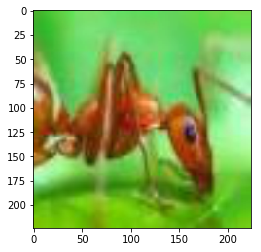

In [4]:
def get_img():
    img, label = dataset[random.randint(0,12003)]
    print(find_label(class_labels[label]))
    displ_img = get_displ_img(img)
    plt.imshow(displ_img)
    return displ_img, label
displ_img, label = get_img()

# Mask/Heatmap Methods

### Grad-Cam

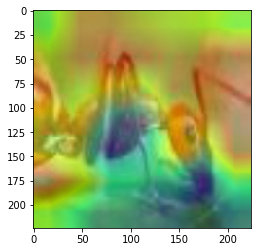

In [10]:
gcam_expl = gen_grounding(displ_img, 'gcam', 'ant', model_name='resnet50', show=True, save=False)

### LIME

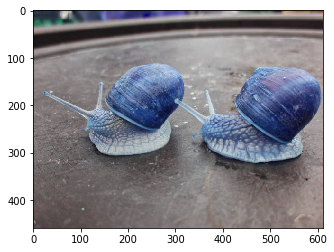

In [95]:
lime_expl, lime_mask = gen_grounding(displ_img, 'vgg19', 'lime', gt_label_name, show=True, save=True, save_path=save_path, label_index=i)

result path: ../results/explanation_examples/trifle/trifle0/
original lime classification: trifle
lime classsification: 644
finished lime explanation
------------------------------


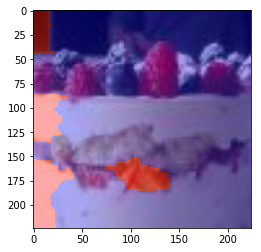

In [89]:
lime_expl, lime_mask = gen_grounding(img, 'vgg19', 'lime', gt_label_name, show=True, save=False, save_path=save_path, label_index=i)

### RISE

In [94]:
rise_expl, rise_mask = gen_grounding(displ_img, 'vgg19', 'rise', gt_label_name, show=True, save_path=save_path, label_index=i)

result path: ../results/explanation_examples/trifle/trifle0/


Generating filters: 100%|██████████| 6000/6000 [00:15<00:00, 395.19it/s]


Masks are generated.
got to stack


KeyboardInterrupt: 

# Saliency Methods

### Integrated Gradients

result path: ../results/explanation_examples/trifle/trifle0/
integrated gradients clasification: viaduct


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


finished Integrated Gradients explanation
saving explanation mask

saved to ../results/explanation_examples/trifle/trifle0/ig-vgg19
------------------------------


ValueError: too many values to unpack (expected 2)

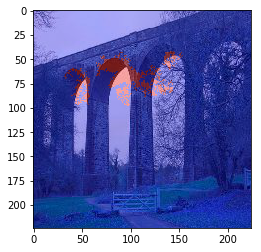

In [106]:
displ_img = cv2.imread('../data/examples/03.jpg')
displ_img = cv2.resize(displ_img, (224, 224))
ig_expl, ig_mask = gen_grounding(displ_img, 'vgg19', 'ig', gt_label_name, show=True, save_path=save_path, label_index=i)

# Get Stats

In [56]:
iou_pix, cos_dist, js_dist, tvd, cc = get_stats(np.float32(ig_mask), lime_mask, threshold=10)

pixel count IoU: 0.004022191400832178
cos similarity: 0.8182256808217385
Jenson Shannon dist: 0.7215742216816708
total variation distance: 0.9933854557551773
Pearsons Correlation Coefficient: -0.05971653644705394
------------------------------


## Calculate IoU

In [ ]:
from techniques.utils import calc_iou, weight_mask

In [ ]:
iou, intersection, union = calc_iou(gcam_mask, lime_mask, threshold=50, num_pixels=True)
print("IoU pixel value sum: {0}".format(iou))

#### Check IoU

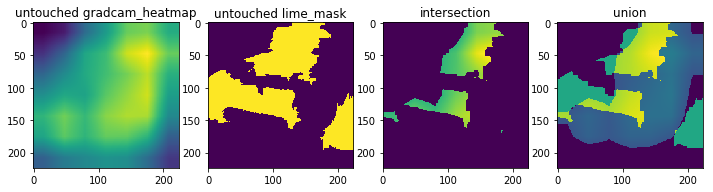

In [87]:
_, axs = plt.subplots(1, 4, figsize=(12, 12))
axs = axs.flatten()
imgs = [gcam_mask, lime_mask, intersection, union]
labels = ['untouched gradcam_heatmap', 'untouched lime_mask', 'intersection', 'union']
for img, ax, label in zip(imgs, axs, labels):
    ax.set_title(label)
    ax.imshow(img)
plt.show()